In [21]:
# https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
# https://medium.com/data-science/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e
# https://gist.github.com/pb111/af439e4affb1dd94879579cfd6793770

In [22]:
# Descision Tree
# 1. Supervised
# 2. Solving reg and classification problem 

In [23]:
# Example Buying a car

# first question it will ask 'BUDGET'
# Entropy Minmum and Information gain Maximum

# Entropy is Randomness

# Entropy is inversly propstional to information gain

# Entropy befor the splitt -[minus] Entropy after the split

In [24]:
# overfit Training Best but training Dull
# underfit Training Dull

# overfitting captures all the points

In [25]:
#Bias and variance

# High Bias underweight, no learning at all
# Hight Variance Overweight

# bias = error due to oversimplification
# Variance = error due to over-complexity

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('car_price_prediction_with_missing.csv')

In [33]:
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1.0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,26613.92,Model X
1,2.0,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,14679.61,5 Series
2,3.0,Audi,2013.0,4.5,Electric,Manual,181601.0,New,44402.61,A4
3,4.0,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,86374.33,Model Y
4,5.0,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496.0,Audi,2020.0,2.4,Petrol,Automatic,22650.0,Like New,61384.10,Q5
2496,2497.0,Audi,2001.0,5.7,Hybrid,Manual,77701.0,Like New,24710.35,A3
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,2499.0,Audi,2002.0,4.5,Diesel,Manual,229164.0,Like New,46085.67,Q5


In [31]:
cols = ['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type','Transmission', 'Mileage', 'Condition', 'Price', 'Model']

In [37]:
X = df.drop(['Car ID', 'Price'], axis=1)

In [38]:
X

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016.0,2.3,Petrol,Manual,114832.0,New,Model X
1,BMW,2018.0,4.4,Electric,Manual,143190.0,Used,5 Series
2,Audi,2013.0,4.5,Electric,Manual,181601.0,New,A4
3,Tesla,2011.0,4.1,Diesel,Automatic,68682.0,New,Model Y
4,Ford,2009.0,2.6,Diesel,Manual,223009.0,Like New,Mustang
...,...,...,...,...,...,...,...,...
2495,Audi,2020.0,2.4,Petrol,Automatic,22650.0,Like New,Q5
2496,Audi,2001.0,5.7,Hybrid,Manual,77701.0,Like New,A3
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,Audi,2002.0,4.5,Diesel,Manual,229164.0,Like New,Q5


In [35]:
y = df['Price']

In [39]:
X = pd.get_dummies(X, columns=['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'])

In [40]:
X

,Year,Engine Size,Mileage,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2016.0,2.3,114832.0,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,2018.0,4.4,143190.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2013.0,4.5,181601.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011.0,4.1,68682.0,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,2009.0,2.6,223009.0,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2020.0,2.4,22650.0,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2496,2001.0,5.7,77701.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2497,NaN,NaN,NaN,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2498,2002.0,4.5,229164.0,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)

In [43]:
model.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [44]:
predictions = model.predict(X_test)

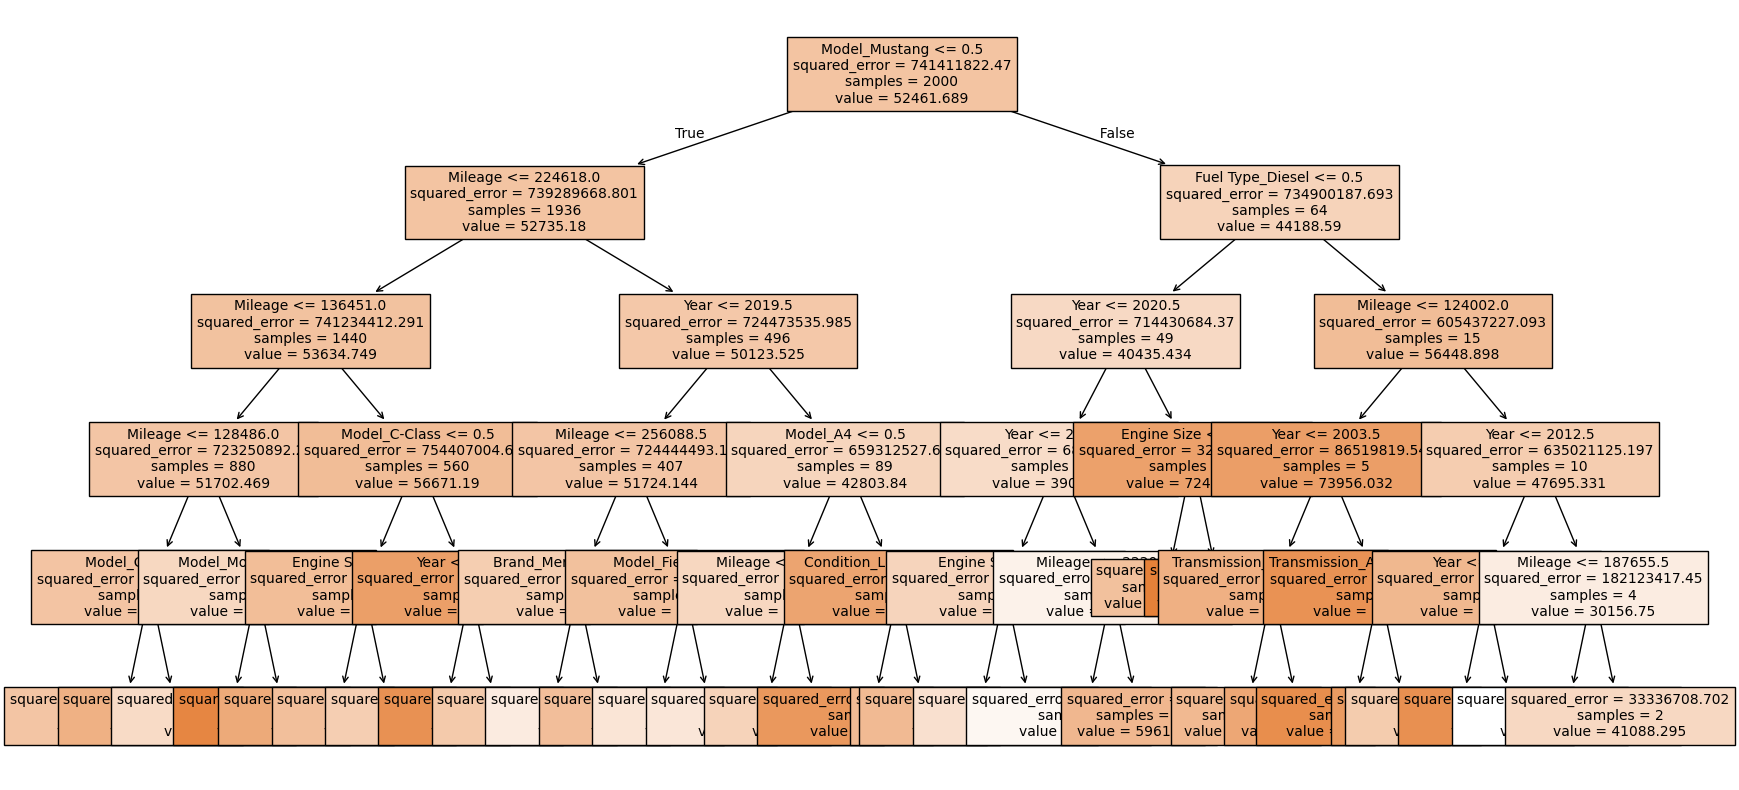

In [47]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

In [52]:
pip install dtreeviz

Note: you may need to restart the kernel to use updated packages.


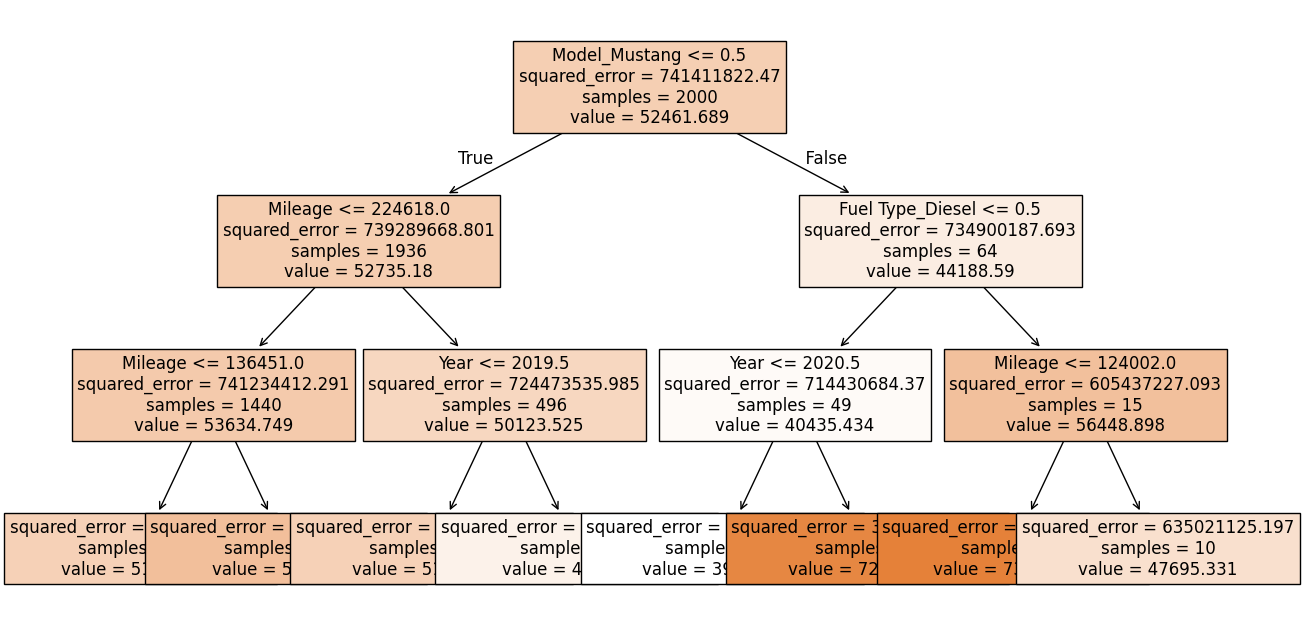

In [55]:
# Limit the depth to 3 levels so you can actually read the nodes
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.show()